Go out and find a dataset of interest. It could be one that helps you work on one of our recommended research questions, or any other dataset that addresses an unsupervised learning question of your own.

Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

You should try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics

## The Data

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

CustomerID: Customer ID
Gender: Whether the customer is a male or a female

Senior Citizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

Tenure: Number of months the customer has stayed with the company

Phone Service: Whether the customer has a phone service or not (Yes, No)

Multiple Lines: Whether the customer has multiple lines or not (Yes, No, No phone service)

Internet Service: Customer’s internet service provider (DSL, Fiber optic, No)

Online Security: Whether the customer has online security or not (Yes, No, No internet service)

Online Backup: Whether the customer has online backup or not (Yes, No, No internet service)

Device Protection: Whether the customer has device protection or not (Yes, No, No internet service)

Tech Support: Whether the customer has tech support or not (Yes, No, No internet service)

Streaming TV: Whether the customer has streaming TV or not (Yes, No, No internet service)

Streaming Movies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two year)

Paperless Billing: Whether the customer has paperless billing or not (Yes, No)

Payment Method: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

Monthly Charges: The amount charged to the customer monthly

Total Charges: The total amount charged to the customer

Churn: Whether the customer churned or not (Yes or No)

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

## Load and explore the data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [5]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines  \
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service   
1  5575-GNVDE    Male              0      No         No      34          Yes                No   
2  3668-QPYBK    Male              0      No         No       2          Yes                No   
3  7795-CFOCW    Male              0      No         No      45           No  No phone service   
4  9237-HQITU  Female              0      No         No       2          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             DSL             No          Yes               No          No          No   
1             DSL            Yes           No              Yes          No          No   
2             DSL            Yes          Yes               No          No          No   
3             DSL            Yes           No              Yes         Yes          No   
4     Fiber optic             No           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  \
0              No  Month-to-month              Yes           Electronic check           29.85   
1              No        One year               No               Mailed check           56.95   
2              No  Month-to-month              Yes               Mailed check           53.85   
3              No        One year               No  Bank transfer (automatic)           42.30   
4              No  Month-to-month              Yes           Electronic check           70.70   

  TotalCharges Churn  
0        29.85    No  
1       1889.5    No  
2       108.15   Yes  
3      1840.75    No  
4       151.65   Yes

In [6]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df.drop(['customerID'], axis=1, inplace=True)

## Visualize the Data

In [10]:
non_numeric_columns = df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
The number of non-numerical columns is 16


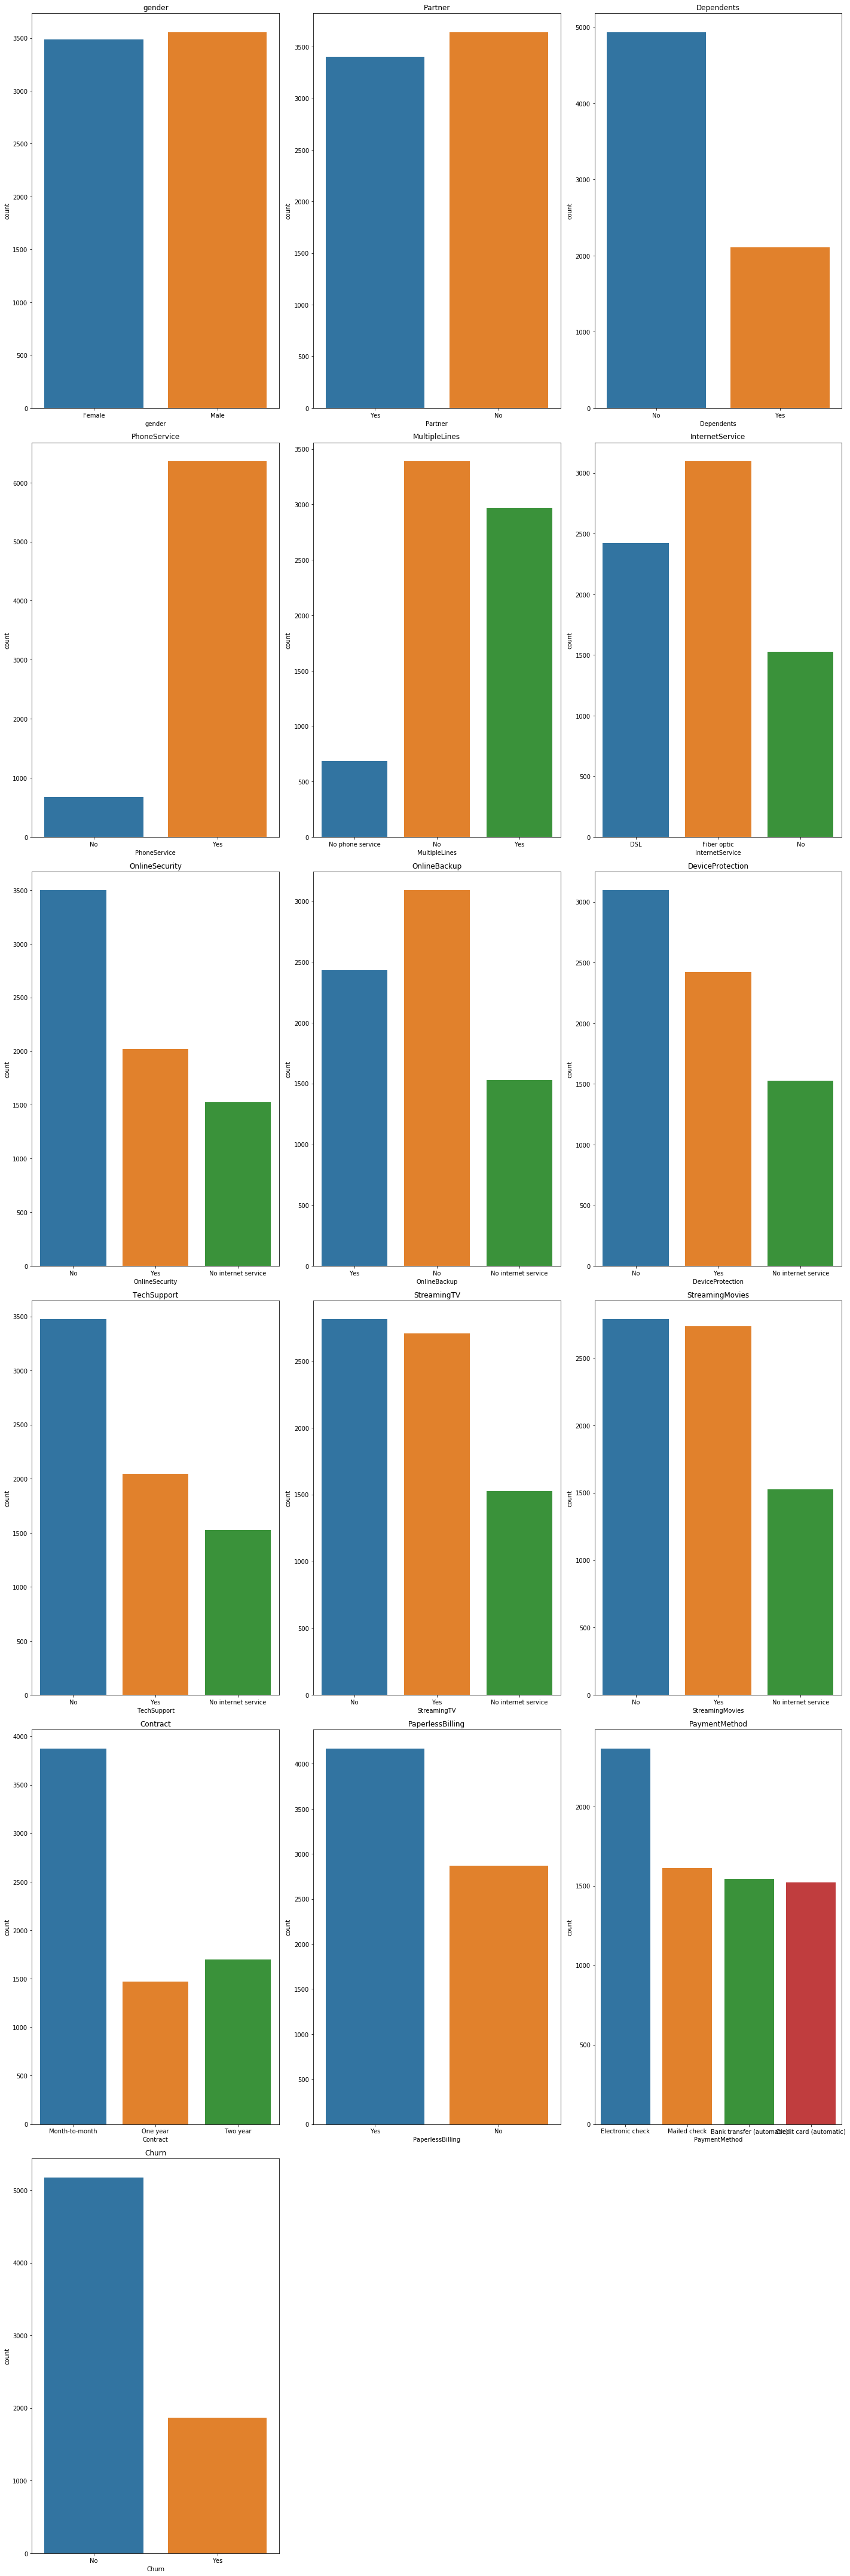

In [11]:
variables_to_plot = list(non_numeric_columns)
fig = plt.figure(figsize=(20,60))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(6,3,i+1)
    ax = sns.countplot(x=var_name, data=df, ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [12]:
numeric_columns = df.select_dtypes(['float64', 'int64', 'uint8']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
The number of numerical columns is 4


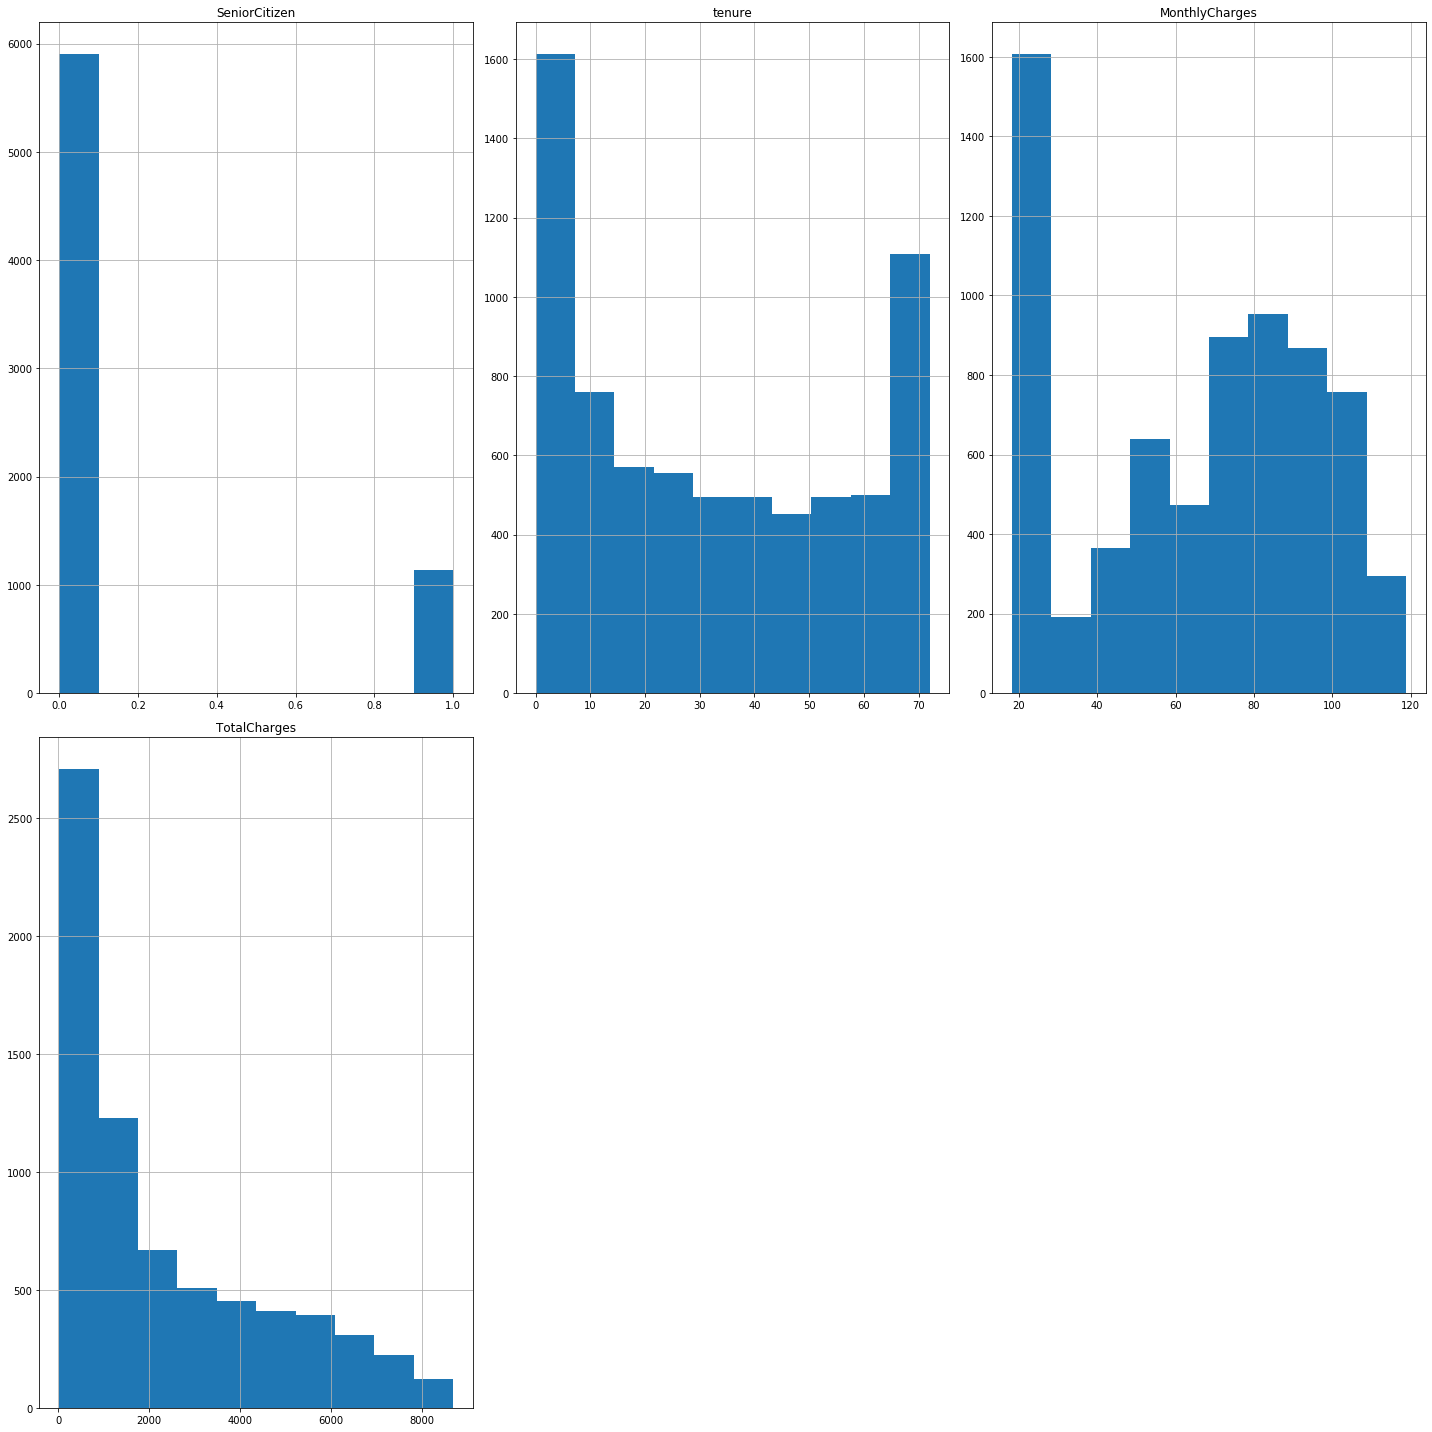

In [17]:
variables_to_plot = list(df[numeric_columns])
fig = plt.figure(figsize=(20,20))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(2,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()

In [ ]:
corr = new_df.corr()
plt.figure(figsize=(20,15))
ax = sns.heatmap(corr, square=True, annot=True, linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Clean the Data

In [18]:
dummy_list = [non_numeric_columns]
for col in dummy_list:
    df = pd.concat([df,pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1)
    dummy_column_names = list(pd.get_dummies(df[col], prefix=col, drop_first=True).columns)

In [19]:
df.dtypes

gender                                    object
SeniorCitizen                              int64
Partner                                   object
Dependents                                object
tenure                                     int64
PhoneService                              object
MultipleLines                             object
InternetService                           object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
Contract                                  object
PaperlessBilling                          object
PaymentMethod                             object
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                     object
gender_Male         

In [20]:
df.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
MultipleLines                             0
InternetService                           0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
Contract                                  0
PaperlessBilling                          0
PaymentMethod                             0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                  

In [21]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [22]:
numeric_columns = df.select_dtypes(['float64', 'int64', 'uint8']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'Churn_Yes'],
      dtype='object')
The number of numerical columns is 31


## Model Preparation

In [23]:
new_df = df[numeric_columns]

In [24]:
#Define the variables
X = new_df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

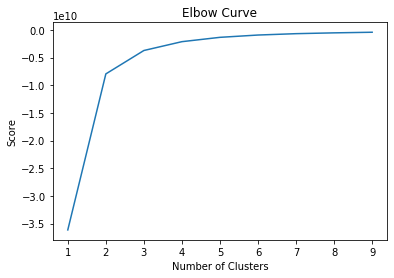

In [25]:
#Elbow Plot
clustno = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in clustno]

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [26]:
#Odd number of rows, in order to split the rows in half, temporarily drop the last row.
X1 = X[:-1]
y = df['Churn_Yes']
scaler = StandardScaler()
X1_std = scaler.fit_transform(X1)

In [27]:
#Spliting the data to compare consistancy across a different numbers of clusters
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1_std)


X1_half1, X1_half2, X1_pcahalf1, X1_pcahalf2 = train_test_split(
    X1_std,
    X1_pca,
    test_size=0.5,
    random_state=13579)

In [28]:
ypred = pd.DataFrame()

for counter, data in enumerate([(X1_half1, X1_pcahalf1), (X1_half2, X1_pcahalf2)]):
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 6):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

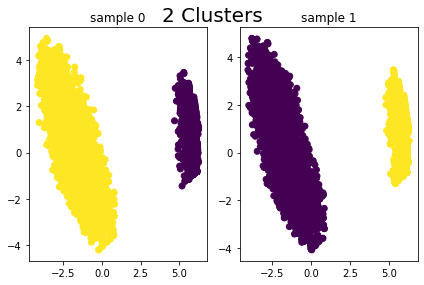

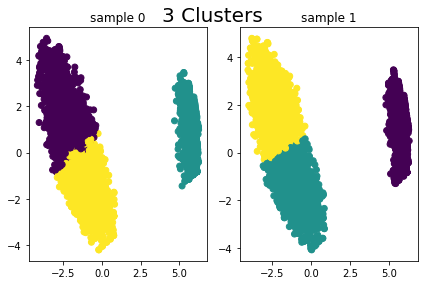

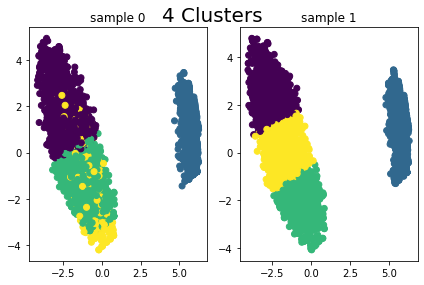

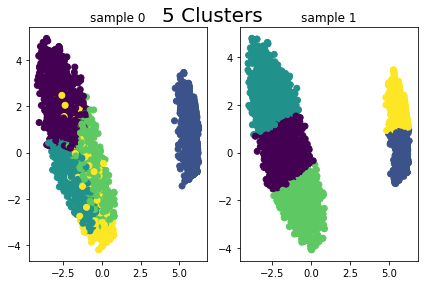

In [29]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 6):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

## Model Selection Phase


### K Means

In [32]:
kmeans_cluster = KMeans(n_clusters=2, random_state=123)


%timeit kmeans_cluster.fit(X_std)
y_pred_km = kmeans_cluster.predict(X_std)

120 ms ± 4.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


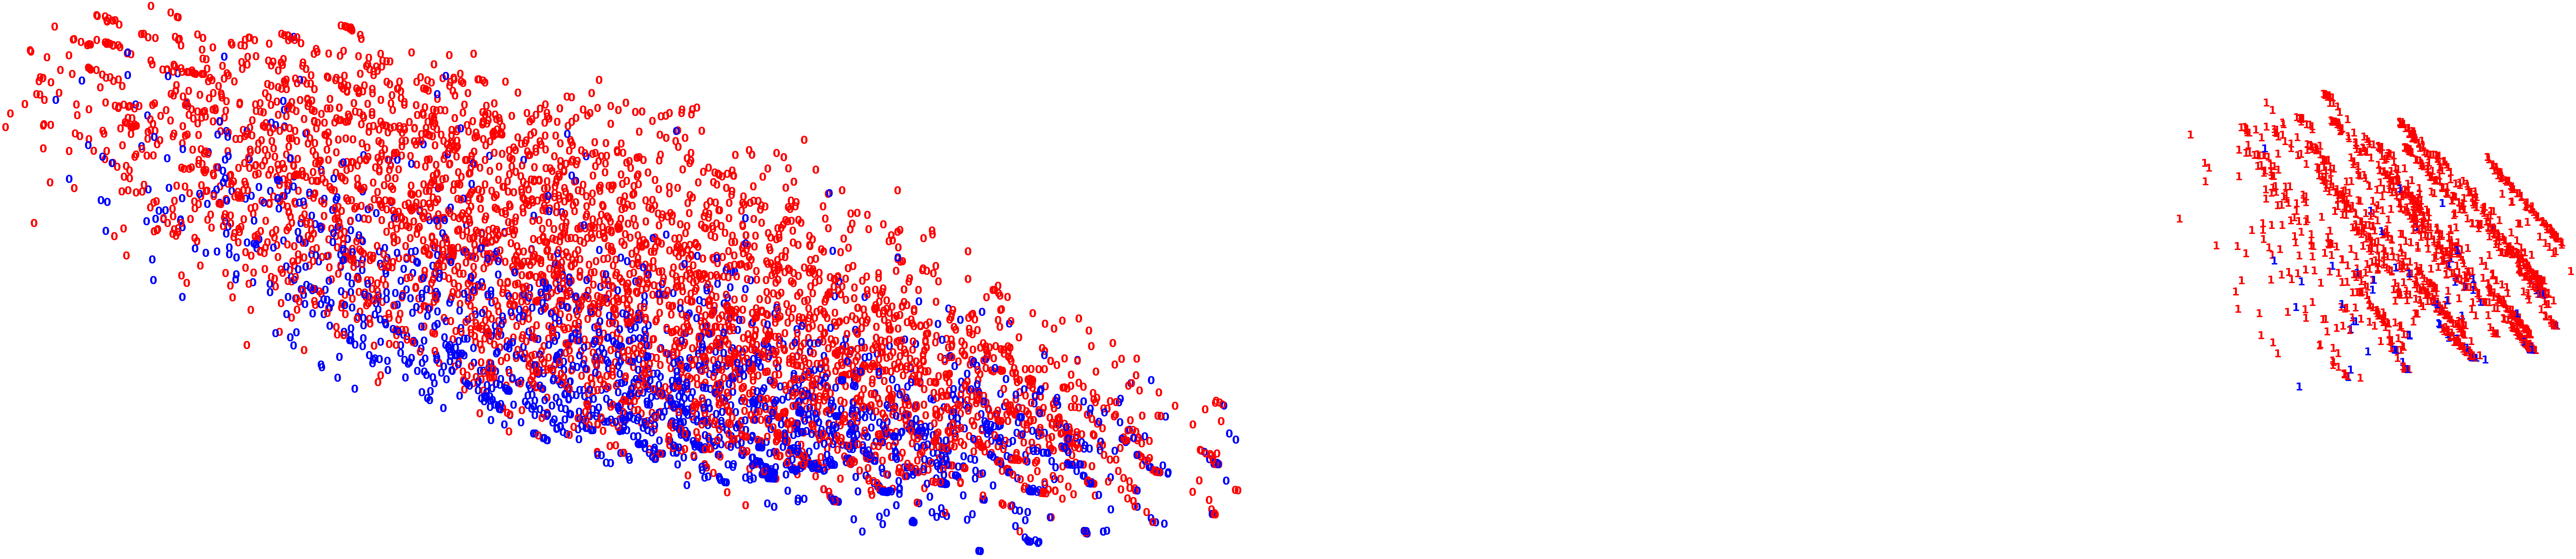

In [33]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(20,5))
colours = 'rb'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred_km[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [34]:
pd.crosstab(y, y_pred_km)

col_0         0     1
Churn_Yes            
0          3761  1413
1          1756   113

In [42]:
print("Adjusted Rand Index of the KMeans Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, y_pred_km)))
print("The silhoutte score of the KMeans Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, y_pred_km, metric='euclidean')))

Adjusted Rand Index of the KMeans Clustering solution: -0.06539325963610504
The silhoutte score of the KMeans Clustering solution: 0.3349331360987445


### Hierarchical Clustering

In [40]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
y_pred_ag = agg_cluster.fit_predict(X_std)

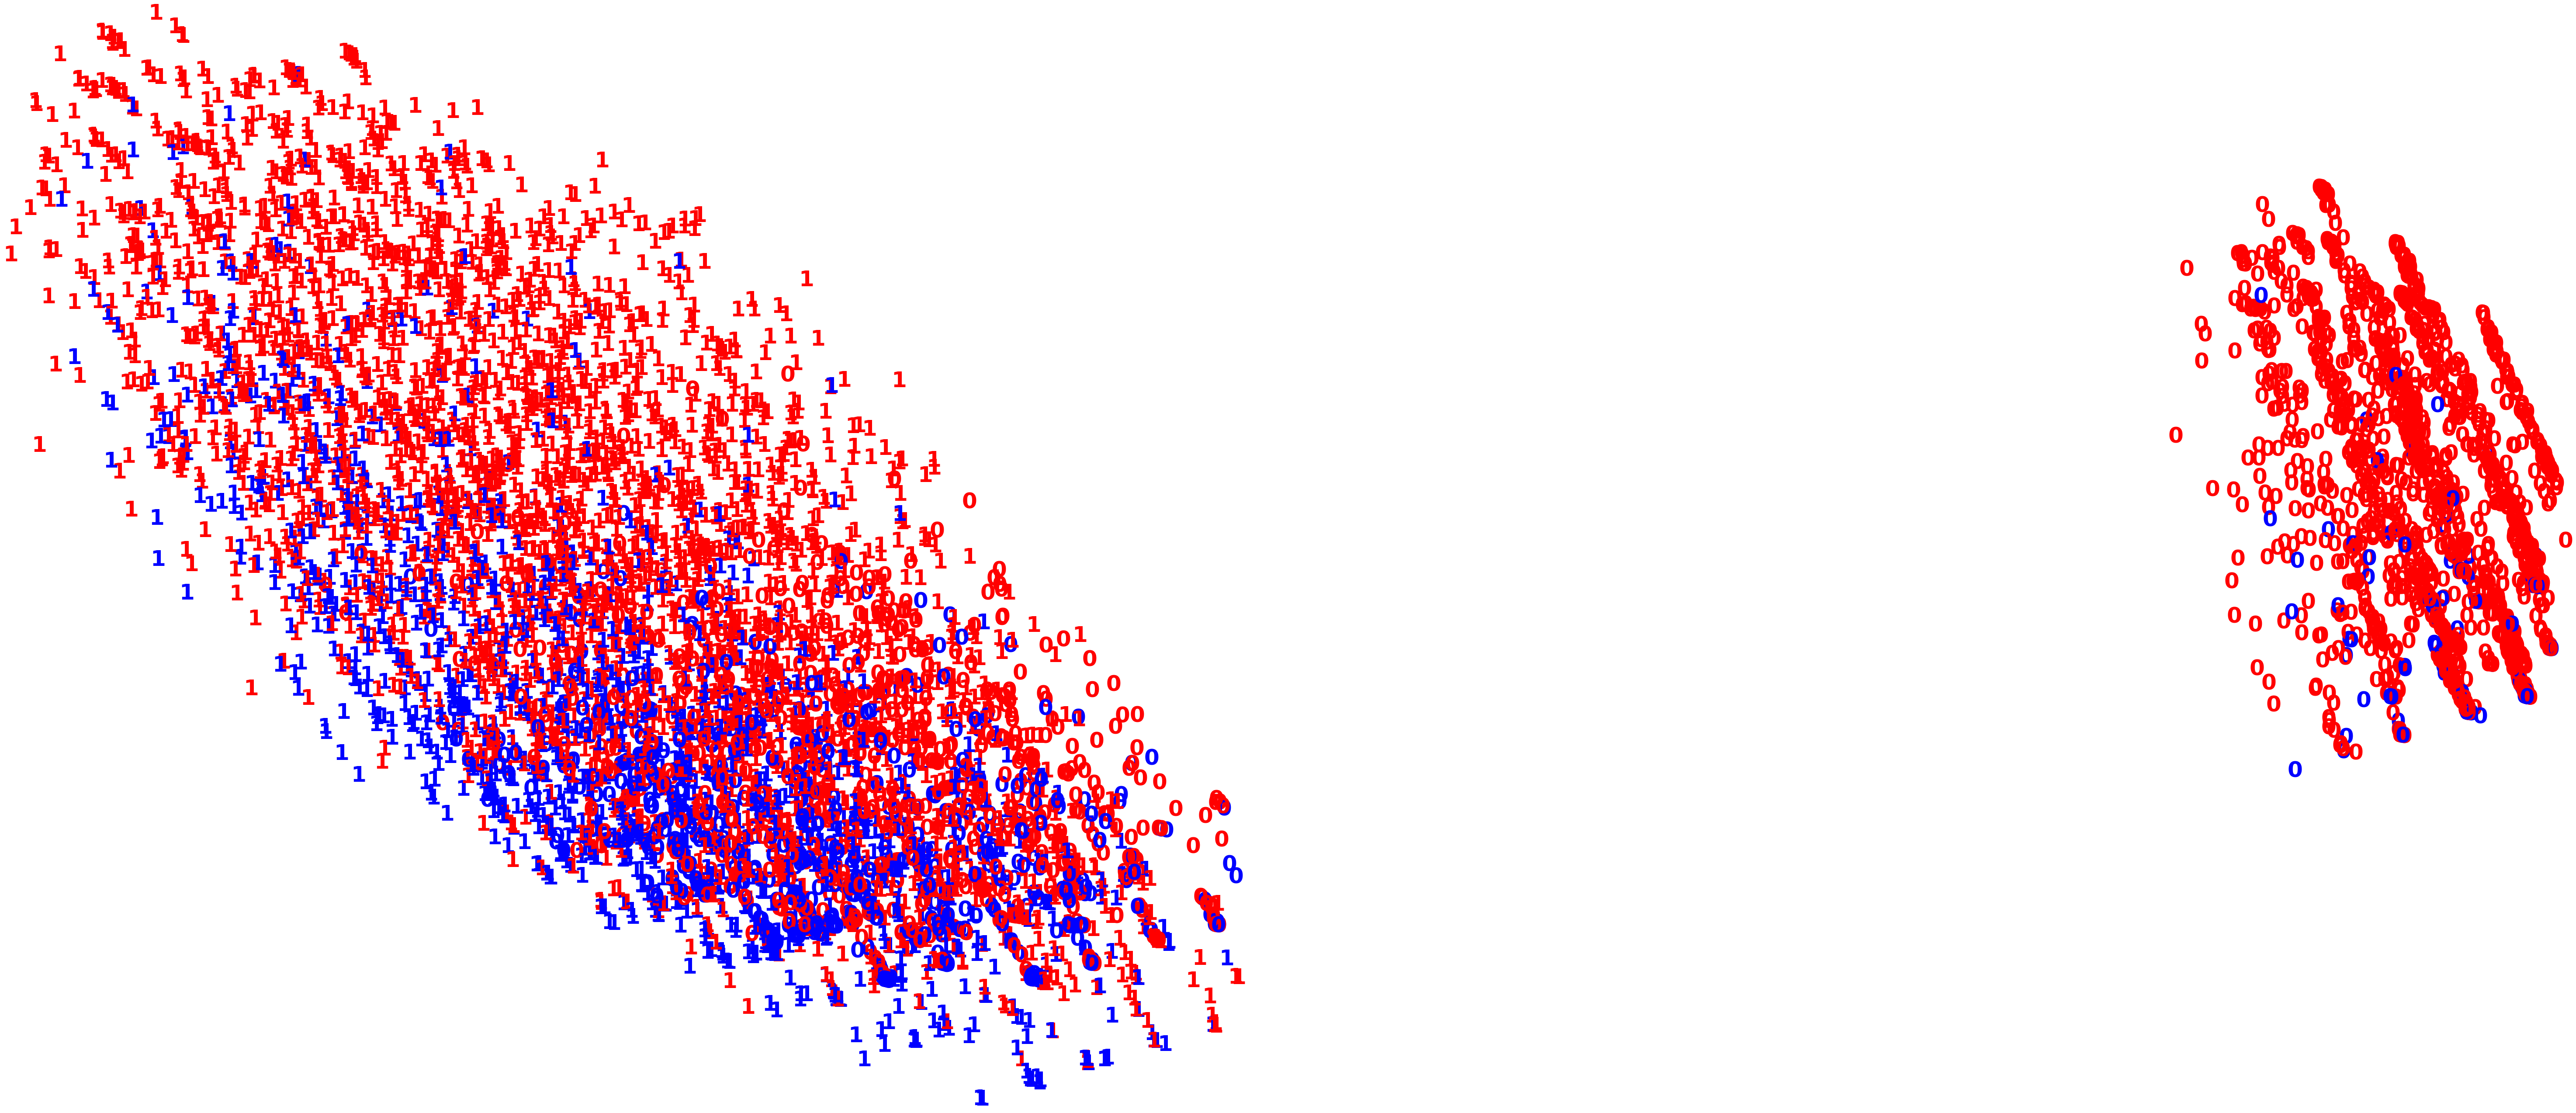

In [41]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred_ag[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [56]:
pd.crosstab(y, y_pred_ag)

col_0         0     1
Churn_Yes            
0          2172  3002
1           693  1176

In [43]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, y_pred_ag)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, y_pred_ag, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: -0.005374353848939782
The silhoutte score of the Agglomerative Clustering solution: 0.15767817068843204


### Gaussian Mixture

In [45]:
from sklearn.mixture import GaussianMixture
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
y_pred_gmm = gmm_cluster.fit_predict(X_std)

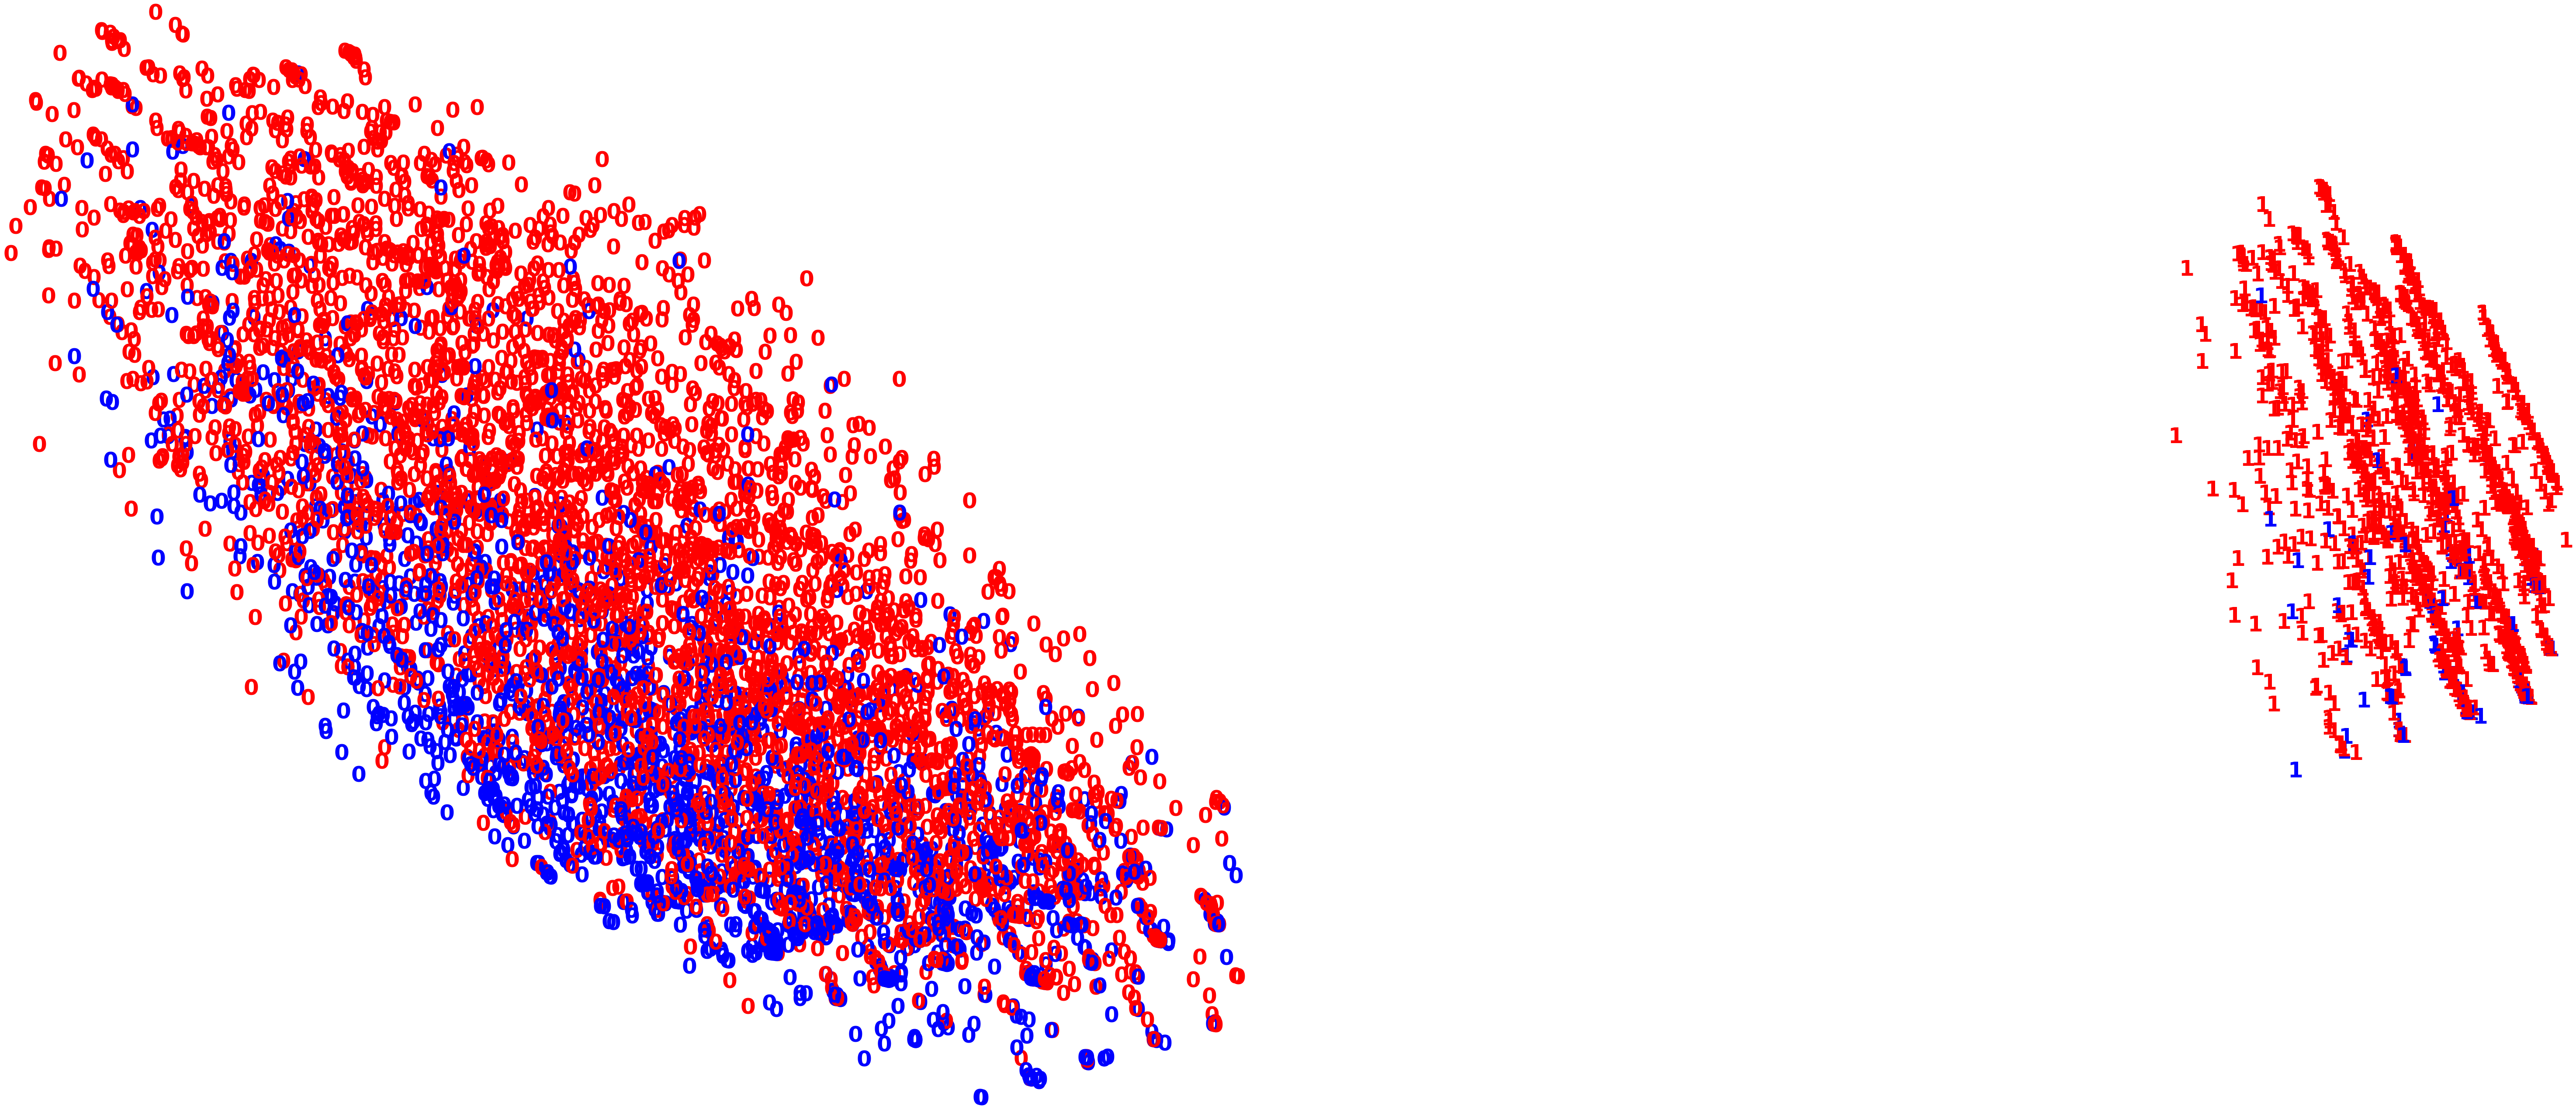

In [46]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred_gmm[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [57]:
pd.crosstab(y, y_pred_gmm)

col_0         0     1
Churn_Yes            
0          3761  1413
1          1756   113

In [48]:
print("Adjusted Rand Index of the Gaussian Mixture Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, y_pred_gmm)))
print("The silhoutte score of the Gaussian Mixture Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, y_pred_gmm, metric='euclidean')))

Adjusted Rand Index of the Gaussian Mixture Clustering solution: -0.06539325963610504
The silhoutte score of the Gaussian Mixture Clustering solution: 0.3349331360987445


All three models produce very similar graphs and evaluative scores. The one main difference I notice is when using hierarchical clustering, the smaller cluster consists of mainly zeros and the larger mostly ones. I do recognize there is a class imbalance with about 2000 churned customers of the 7000 total customers. The hierarchical method seems to balance out the predictions more than Kmeans and Gaussian Mixture, but has a lower silhouette score and an ARI that is only slightly closer to one. The clusters appear to be oblong, which leads me in the direction of using Gaussian Mixture. My next step will be to tune this model to try to produce better results.

### Tuning Gaussian Mixture

In [62]:
# Defining the agglomerative clustering
gmm_cluster_tied = GaussianMixture(n_components=2, random_state=123, covariance_type="tied")

# Fit model
y_pred_tied = gmm_cluster_tied.fit_predict(X_std)

print("ARI score with covariance_type=tied: {}".format(
    metrics.adjusted_rand_score(y, y_pred_tied)))

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(X_std, y_pred_tied, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster_diag = GaussianMixture(n_components=2, random_state=123, covariance_type="diag")

# Fit model
y_pred_diag = gmm_cluster_diag.fit_predict(X_std)

print("ARI score with covariance_type=diag: {}".format(
    metrics.adjusted_rand_score(y, y_pred_diag)))

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(X_std, y_pred_diag, metric='euclidean')))
print("------------------------------------------------------")


# Defining the agglomerative clustering
gmm_cluster_spher = GaussianMixture(n_components=2, random_state=123, covariance_type="spherical")

# Fit model
y_pred_spher = gmm_cluster_spher.fit_predict(X_std)

print("ARI score with covariance_type=spherical: {}".format(
    metrics.adjusted_rand_score(y, y_pred_spher)))

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(X_std, y_pred_spher, metric='euclidean')))
print("------------------------------------------------------")

ARI score with covariance_type=tied: -0.06539325963610504
Silhouette score with covariance_type=tied: 0.3349331360987445
------------------------------------------------------
ARI score with covariance_type=diag: -0.06539325963610504
Silhouette score with covariance_type=diag: 0.3349331360987445
------------------------------------------------------
ARI score with covariance_type=spherical: -0.06539325963610504
Silhouette score with covariance_type=spherical: 0.3349331360987445
------------------------------------------------------


After modeling the data with 3 techniques and tuning the gaussian model, I continued to get an ARI of -0.065 and a silhouette score of 0.335. Based on those values and the graph of the results, it's pretty clear that the given data does not do a sufficient job of clustering customers to predict churn. The graphs from all 3 models show two clearly defined clusters. My next steps would be to dig deeper into the clusters that are produced by these models. I wonder what information can be gathered by these two groups. I would also be interested to see the effect of adding the "Churn" variable back in to see if it would impact the number of clusters or the evaluate measures. 